In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plotagem(bits, sinal_codificado, rotulos):
    """
    Plota a codificação HDB3 com base na sequência de bits fornecida e exibe os rótulos 'B' e 'V'.

    Args:
        bits (list): A sequência de bits a ser plotada.
    """
    # Codifica os bits usando a regra HDB3
    
    # Configura o tempo para o gráfico (1 segundo por bit)
    t = np.arange(0, len(sinal_codificado), 0.005)

    # Cria o sinal NRZ-L (nível alto para '1' e nível baixo para '0')
    signal = np.repeat(sinal_codificado, 200)  # Repetimos os valores para cada intervalo de tempo

    # Ajusta o sinal para ser mostrado entre 0 e 1 (para o eixo y)
    signal = (np.array(signal) + 1) / 2  # Converte -1 para 0 e +1 para 1

    # Plota o sinal
    plt.step(t, signal, where='post', linewidth=2)

    # Configurações do gráfico
    plt.ylim(-0.1, 1.5)
    plt.xlim(0, len(bits))  # O eixo x vai de 0 até o número de bits
    plt.title("Codificação HDB3")
    plt.grid(True)

    # Adiciona os bits no topo do gráfico
    for i, bit in enumerate(bits):
        plt.text(i + 0.5, 1.25, str(bit), fontsize=12, ha='center')  # Posiciona os bits acima do gráfico

    # Adiciona os rótulos 'B' e 'V' apenas para os pulsos de conformidade e violação
    for i, rotulo in enumerate(rotulos):
        if rotulo == 'B':  # Se for um pulso de conformidade
            plt.text(i + 0.5, 0.7, 'B', fontsize=12, ha='center', color='green')
        elif rotulo == 'V':  # Se for um pulso de violação
            plt.text(i + 0.5, 0.7, 'V', fontsize=12, ha='center', color='red')

    # Desenha linhas verticais para separar cada bit no gráfico
    for i in range(len(bits)):
        plt.axvline(x=i, color='gray', linestyle='--', linewidth=1)

    # Define os valores do eixo x para representar o tempo em segundos
    plt.xticks(np.arange(0, len(bits)+1, 1), labels=np.arange(0, len(bits)+1, 1))

    # Define os valores do eixo y para serem 0 e 1
    plt.yticks([0, 1], labels=['0', '1'])

    plt.xlabel('Tempo')
    plt.ylabel('Nível do sinal')

    plt.show()

In [8]:
def codificador_hdb3(bits):

    #Informações para montar gráfico
    sinal = [] #polaridade dos pulsos (1 para cima, -1 para baixo, 0 para representar ausência de pulso)
    rotulos = [] #Lista destinada a guarda rótulo de cada pulso (B, V ou None)
    c_zeros = 0 #Variavel destinada a registrar sequências de zeros 

    pulsos = 0 #variavel para armazenar quantidade de pulsos
    polaridade_atual = -1 #variavel destinada a armazenar o ultimo valor de polaridade do pulso de bit

    for bit in bits:

        if bit == 1: # analise bit 1
            pulsos += 1
            polaridade_atual *= -1
            sinal.append(polaridade_atual)
            rotulos.append(None)

            c_zeros = 0 # para certificar de que não haverá rotulagem invalida

        else: # analise bit 0
            c_zeros += 1
            if c_zeros == 4: #oportunidade de substituição (B00V, 000V)
                if pulsos % 2 == 0: 
                    sinal[-3:] = [-polaridade_atual, 0, 0, -polaridade_atual]
                    rotulos [ -3:] = ['B', None, None, 'V']
                    polaridade_atual *= -1
                else:
                    sinal[-3:] = [0, 0, 0, polaridade_atual]
                    rotulos[-3:] = [None, None, None, 'V']
                pulsos = 0
                c_zeros = 0

            else:
                sinal.append(0)
                rotulos.append(None)
                
    print(pulsos)
    return sinal, rotulos

4


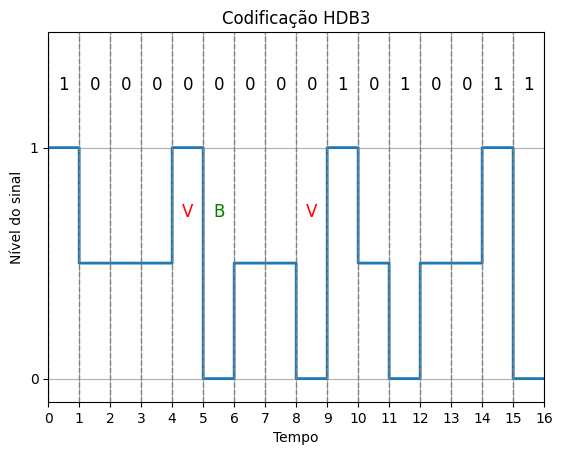

1


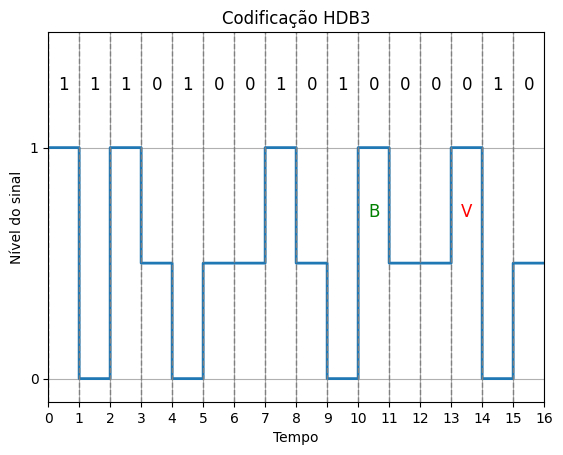

In [9]:
from codificador import codificador_hdb3
from plotter import plotagem

"""
Definição HDB3:

É uma família de códigos semelhante ao AMI, porém evita 
longas sequências de zeros. 
Sequências de mais de “n”(nesse caso, 3) bits nulos sucessivos são substituídos 
por uma marca de violação ("V"),

A regra regra de codificação do HDB3 é substituir toda a
sequência de quatro zeros consecutivos pela sequência
B00V ou 000V, onde B é um pulso em conformidade com a
regra AMI, e V representa um pulso que viola a regra AMI. 
A escolha da sequência B00V ou 000V é feita de tal modo 
que o número de pulsos entre dois pulsos violados 
consecutivos seja sempre impar.
"""

def main():

    # Testando com o conjunto de bits
    conjunto_bits = {
        1: [1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1], # Conjunto de bits da tarefa
        2: [1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0], #Conjunto de bits da tarefa
        3: [1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    }

    sinal_codificado, rotulos_plot = codificador_hdb3(conjunto_bits[1])
    plotagem(conjunto_bits[1], sinal_codificado, rotulos_plot)

    sinal_codificado, rotulos_plot = codificador_hdb3(conjunto_bits[2])
    plotagem(conjunto_bits[2], sinal_codificado, rotulos_plot)

if __name__ == "__main__":
    main()
